In [1]:
import sys
import os

import pandas as pd
%matplotlib inline
import urllib.request


In [2]:
try:
    import kusto_pandas
except:
    sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(""), '..')))
    import kusto_pandas
from kusto_pandas import Wrap

In [3]:
def dowload_dataset_if_necessary(url, filename):
    if not os.path.exists(filename):
        urllib.request.urlretrieve (url, filename)
url = "https://projects.fivethirtyeight.com/trump-approval-data/approval_polllist.csv"
filename = "approval_polllist.csv"
dowload_dataset_if_necessary(url, filename)
data = pd.read_csv(filename)
data.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,1/20/2021,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.680029,...,37.0,45.686784,38.055805,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,11:47:59 20 Jan 2021
1,Donald Trump,All polls,1/20/2021,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.262323,...,45.0,45.861441,43.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,11:47:59 20 Jan 2021
2,Donald Trump,All polls,1/20/2021,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.153481,...,45.2,43.451563,43.780389,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,11:47:59 20 Jan 2021
3,Donald Trump,All polls,1/20/2021,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.242845,...,46.0,45.861441,44.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,11:47:59 20 Jan 2021
4,Donald Trump,All polls,1/20/2021,1/22/2017,1/24/2017,Gallup,B,1500.0,a,0.227380,...,45.0,46.861441,43.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49236,77248,1/25/2017,11:47:59 20 Jan 2021


In [4]:
data.columns

Index(['president', 'subgroup', 'modeldate', 'startdate', 'enddate',
       'pollster', 'grade', 'samplesize', 'population', 'weight', 'influence',
       'approve', 'disapprove', 'adjusted_approve', 'adjusted_disapprove',
       'multiversions', 'tracking', 'url', 'poll_id', 'question_id',
       'createddate', 'timestamp'],
      dtype='object')

In [16]:
w = Wrap(data)
w.take(5)

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,1/20/2021,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.680029,...,37.0,45.686784,38.055805,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,11:47:59 20 Jan 2021
1,Donald Trump,All polls,1/20/2021,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.262323,...,45.0,45.861441,43.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,11:47:59 20 Jan 2021
2,Donald Trump,All polls,1/20/2021,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.153481,...,45.2,43.451563,43.780389,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,11:47:59 20 Jan 2021
3,Donald Trump,All polls,1/20/2021,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.242845,...,46.0,45.861441,44.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,11:47:59 20 Jan 2021
4,Donald Trump,All polls,1/20/2021,1/22/2017,1/24/2017,Gallup,B,1500.0,a,0.227380,...,45.0,46.861441,43.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49236,77248,1/25/2017,11:47:59 20 Jan 2021


In [12]:
w.summarize("count() by president")

,president,count_
0,Donald Trump,16500


In [13]:
w.summarize("count(), min(startdate), max(startdate), dcount(pollster), avg(disapprove)")

,count_,min_startdate,max_startdate,dcount_pollster,avg_disapprove
0,16500,1/1/2018,9/9/2020,93,53.31449


In [14]:
w.summarize("count() by pollster, grade").top(10, "count_")

,pollster,grade,count_
62,YouGov,B,4582
26,Ipsos,B-,2717
33,Morning Consult,B/C,2353
43,Rasmussen Reports/Pulse Opinion Research,C+,2012
23,HarrisX,C,896
17,Gallup,B,859
51,SurveyMonkey,D-,494
29,Marist College,A+,140
41,Quinnipiac University,B+,140
1,American Research Group,B,127


In [26]:
w = w.extend("enddate = todatetime(enddate)")
w

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,1/20/2021,1/20/2017,2017-01-22,Morning Consult,B/C,1992.0,rv,0.680029,...,37.0,45.686784,38.055805,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,11:47:59 20 Jan 2021
1,Donald Trump,All polls,1/20/2021,1/20/2017,2017-01-22,Gallup,B,1500.0,a,0.262323,...,45.0,45.861441,43.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,11:47:59 20 Jan 2021
2,Donald Trump,All polls,1/20/2021,1/20/2017,2017-01-24,Ipsos,B-,1632.0,a,0.153481,...,45.2,43.451563,43.780389,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,11:47:59 20 Jan 2021
3,Donald Trump,All polls,1/20/2021,1/21/2017,2017-01-23,Gallup,B,1500.0,a,0.242845,...,46.0,45.861441,44.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,11:47:59 20 Jan 2021
4,Donald Trump,All polls,1/20/2021,1/22/2017,2017-01-24,Gallup,B,1500.0,a,0.227380,...,45.0,46.861441,43.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49236,77248,1/25/2017,11:47:59 20 Jan 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16495,Donald Trump,Voters,1/20/2021,1/15/2021,2021-01-17,Quinnipiac University,B+,1131.0,rv,1.345482,...,61.0,36.758206,59.198940,NaN,NaN,https://poll.qu.edu/national/release-detail?Re...,74214,139262,1/18/2021,11:52:51 20 Jan 2021
16496,Donald Trump,Voters,1/20/2021,1/14/2021,2021-01-18,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.569744,...,48.0,46.837601,48.988128,NaN,T,http://www.rasmussenreports.com/public_content...,74221,139287,1/19/2021,11:52:51 20 Jan 2021
16497,Donald Trump,Voters,1/20/2021,1/15/2021,2021-01-17,Morning Consult,B/C,1993.0,rv,0.093102,...,58.0,39.495997,58.343779,NaN,NaN,https://assets.morningconsult.com/wp-uploads/2...,74218,139267,1/19/2021,11:52:51 20 Jan 2021
16498,Donald Trump,Voters,1/20/2021,1/16/2021,2021-01-19,American Research Group,B,990.0,rv,1.314191,...,67.0,32.325063,63.443719,NaN,NaN,https://americanresearchgroup.com/economy/,74226,139307,1/20/2021,11:52:51 20 Jan 2021


<AxesSubplot:xlabel='bin_enddate'>

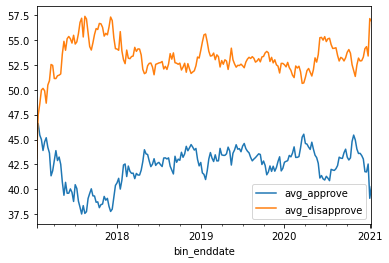

In [27]:
(w.summarize("avg(approve), avg(disapprove) by bin(enddate, 7d)")
.render("timechart"))

<AxesSubplot:xlabel='pollster'>

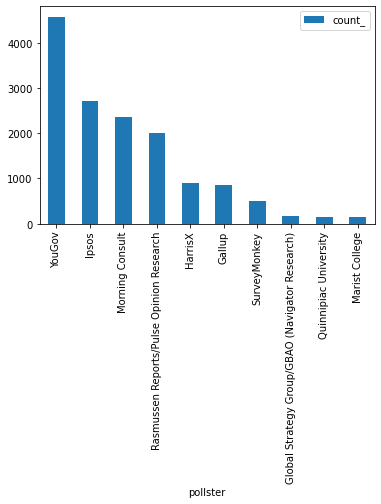

In [28]:
(w.summarize("count() by pollster")
 .top("10 by count_")
 .render("barchart"))

<AxesSubplot:xlabel='pollster'>

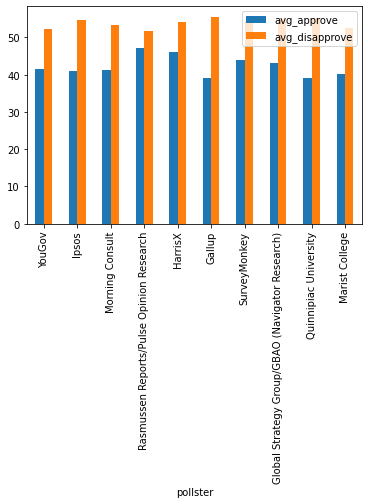

In [29]:
(w
 .summarize("num_polls= count(), avg(approve), avg(disapprove) by pollster")
 .top(10, "num_polls")
 .project_away("num_polls")
 .render("barchart"))